In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from skimage.color import rgb2gray,gray2rgb
from sklearn.decomposition import PCA

In [2]:
B=np.random.rand(150,150)
A=np.zeros((150,150))
for row in range(150):
    for col in range(150):
        if row<50 and col<50 or 50<=row<100 and 50<=col<100 or row>=100 and col>=100:
            A[row,col]=0.7
        else:
            A[row,col]=0.3
        if A[row,col]<=B[row,col]:
            A[row,col]=1
        else:
            A[row,col]=0
print(A)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 1. 1.]
 [0. 1. 1. ... 1. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]]


In [3]:
##shuffle colums andd row
shuffled_indices = np.random.permutation(A.shape[0])
A= A[shuffled_indices]
A=np.transpose(A)
A= A[shuffled_indices]
A=np.transpose(A)
A=np.float32(A)

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.001)

In [5]:
attempts=10
error, labels, (centers) =cv2.kmeans(A,3,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
error

4631.840127944946

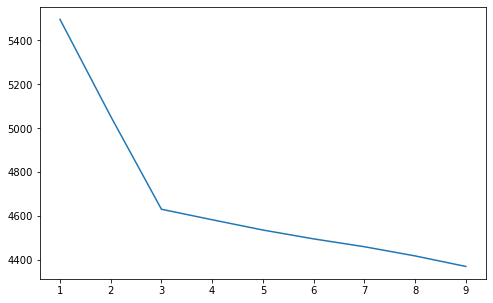

In [6]:
errors= []
attempts = 10
for k in range(1,10):
    error, labels, (centers) =cv2.kmeans(A,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS) 
    errors.append(error)
plt.figure(figsize=(8, 5))
x=np.arange(1,k+1)
plt.plot(x,errors)
plt.show()

In [7]:
error, labels, (centers) =cv2.kmeans(A,3,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
error 

4631.840127944946

clustering data by k_means and using Albow method can be seen the best cluster is done at k = 3